## Context

To know about Univariate and Multivariate Data Analysis.

## Contents:

 
1. Import necessary libraries and Load Data
2. Univariate Data Analysis
3. Checking distribution of data - distplot, violin plot, histograms, commulative distributions
4. Multivariate Data Analysis


## Objective

To perform Univariate and multivariate Analysis.

## Attributes:

1. Suburb	
2. Address	
3. Rooms	
4. Type	
5. Method	
6. SellerG	
7. Date	
8. Distance	
9. Postcode	
10. Bedroom	
11. Bathroom	
12. Car	
13. Landsize	
14. BuildingArea	
15. YearBuilt
16. CouncilArea	
17. Latitude	
18. Longtitude	
19. Regionname	
20. Propertycount	
21. ParkingArea	
22. Price


## Loading Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

## Setting Options

In [63]:
# to suppress warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [64]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [65]:
df.shape

(34857, 22)

This dataset contains 22 columns. For the sake of univariate analysis let us use just one column of data - 'Distance'.

In [66]:
len(df)

34857

**First step is to check if we have any missing values or not.**

In [67]:
df['Distance'].isnull().sum()

1

In [68]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [69]:
#Drop all missing value columns. You can also impute it with mean , median etc

#Creating copy first of original dataset
df1= df.copy(deep =True
            )
df1.dropna(inplace = True)

In [70]:
df1.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longtitude       0
Regionname       0
Propertycount    0
ParkingArea      0
Price            0
dtype: int64

# Univariate Analysis

Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis. 

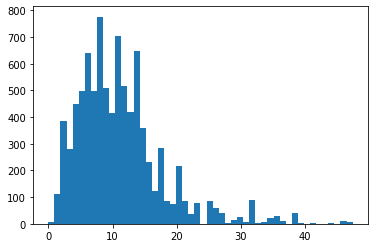

In [71]:
plt.hist(df1['Distance'],bins=50);

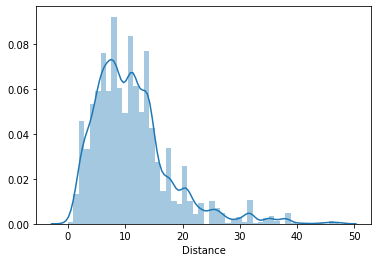

In [72]:
sns.distplot(df1['Distance']);

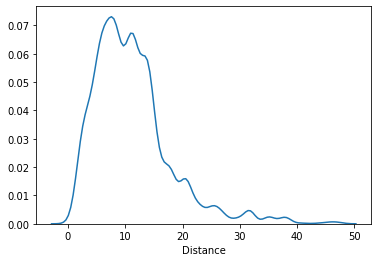

In [74]:
sns.distplot(df1['Distance'], hist = False);

We can see that above distribution is Right Skewed.

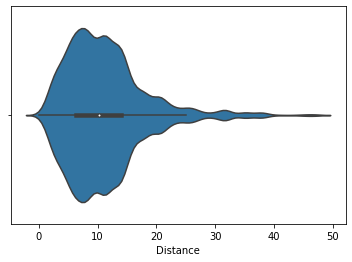

In [75]:
sns.violinplot(df1['Distance']);

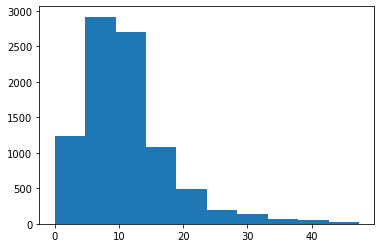

In [76]:
plt.hist(df1['Distance'], bins=10);

    
- In the above histogram we can see that the second bin with class limits (4.81,  9.62) has the most number of observations. 
- A bulk of the observations lie within the first four classes. The rest of the six classes contain only a very few observations.
- In this case we are measuring distances. We can safely say based on visual observation that most of the distance present on the data are less than 20 kms.
- There are a very few distances that are more than 20 kms. Once we pass the 30 km point the number of observations dlrops further.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line.
- We can see from the above figure that the mode and the mean are very close to each other and that the median is lower than both.

#### Now we have an idea of how the data is distributed.

#### Cummulative distribution

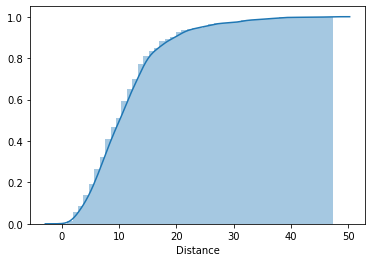

In [77]:
sns.distplot(df1['Distance'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));

# Multivariate Analysis

Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2

ex: Pairplot, 3D scatter plot

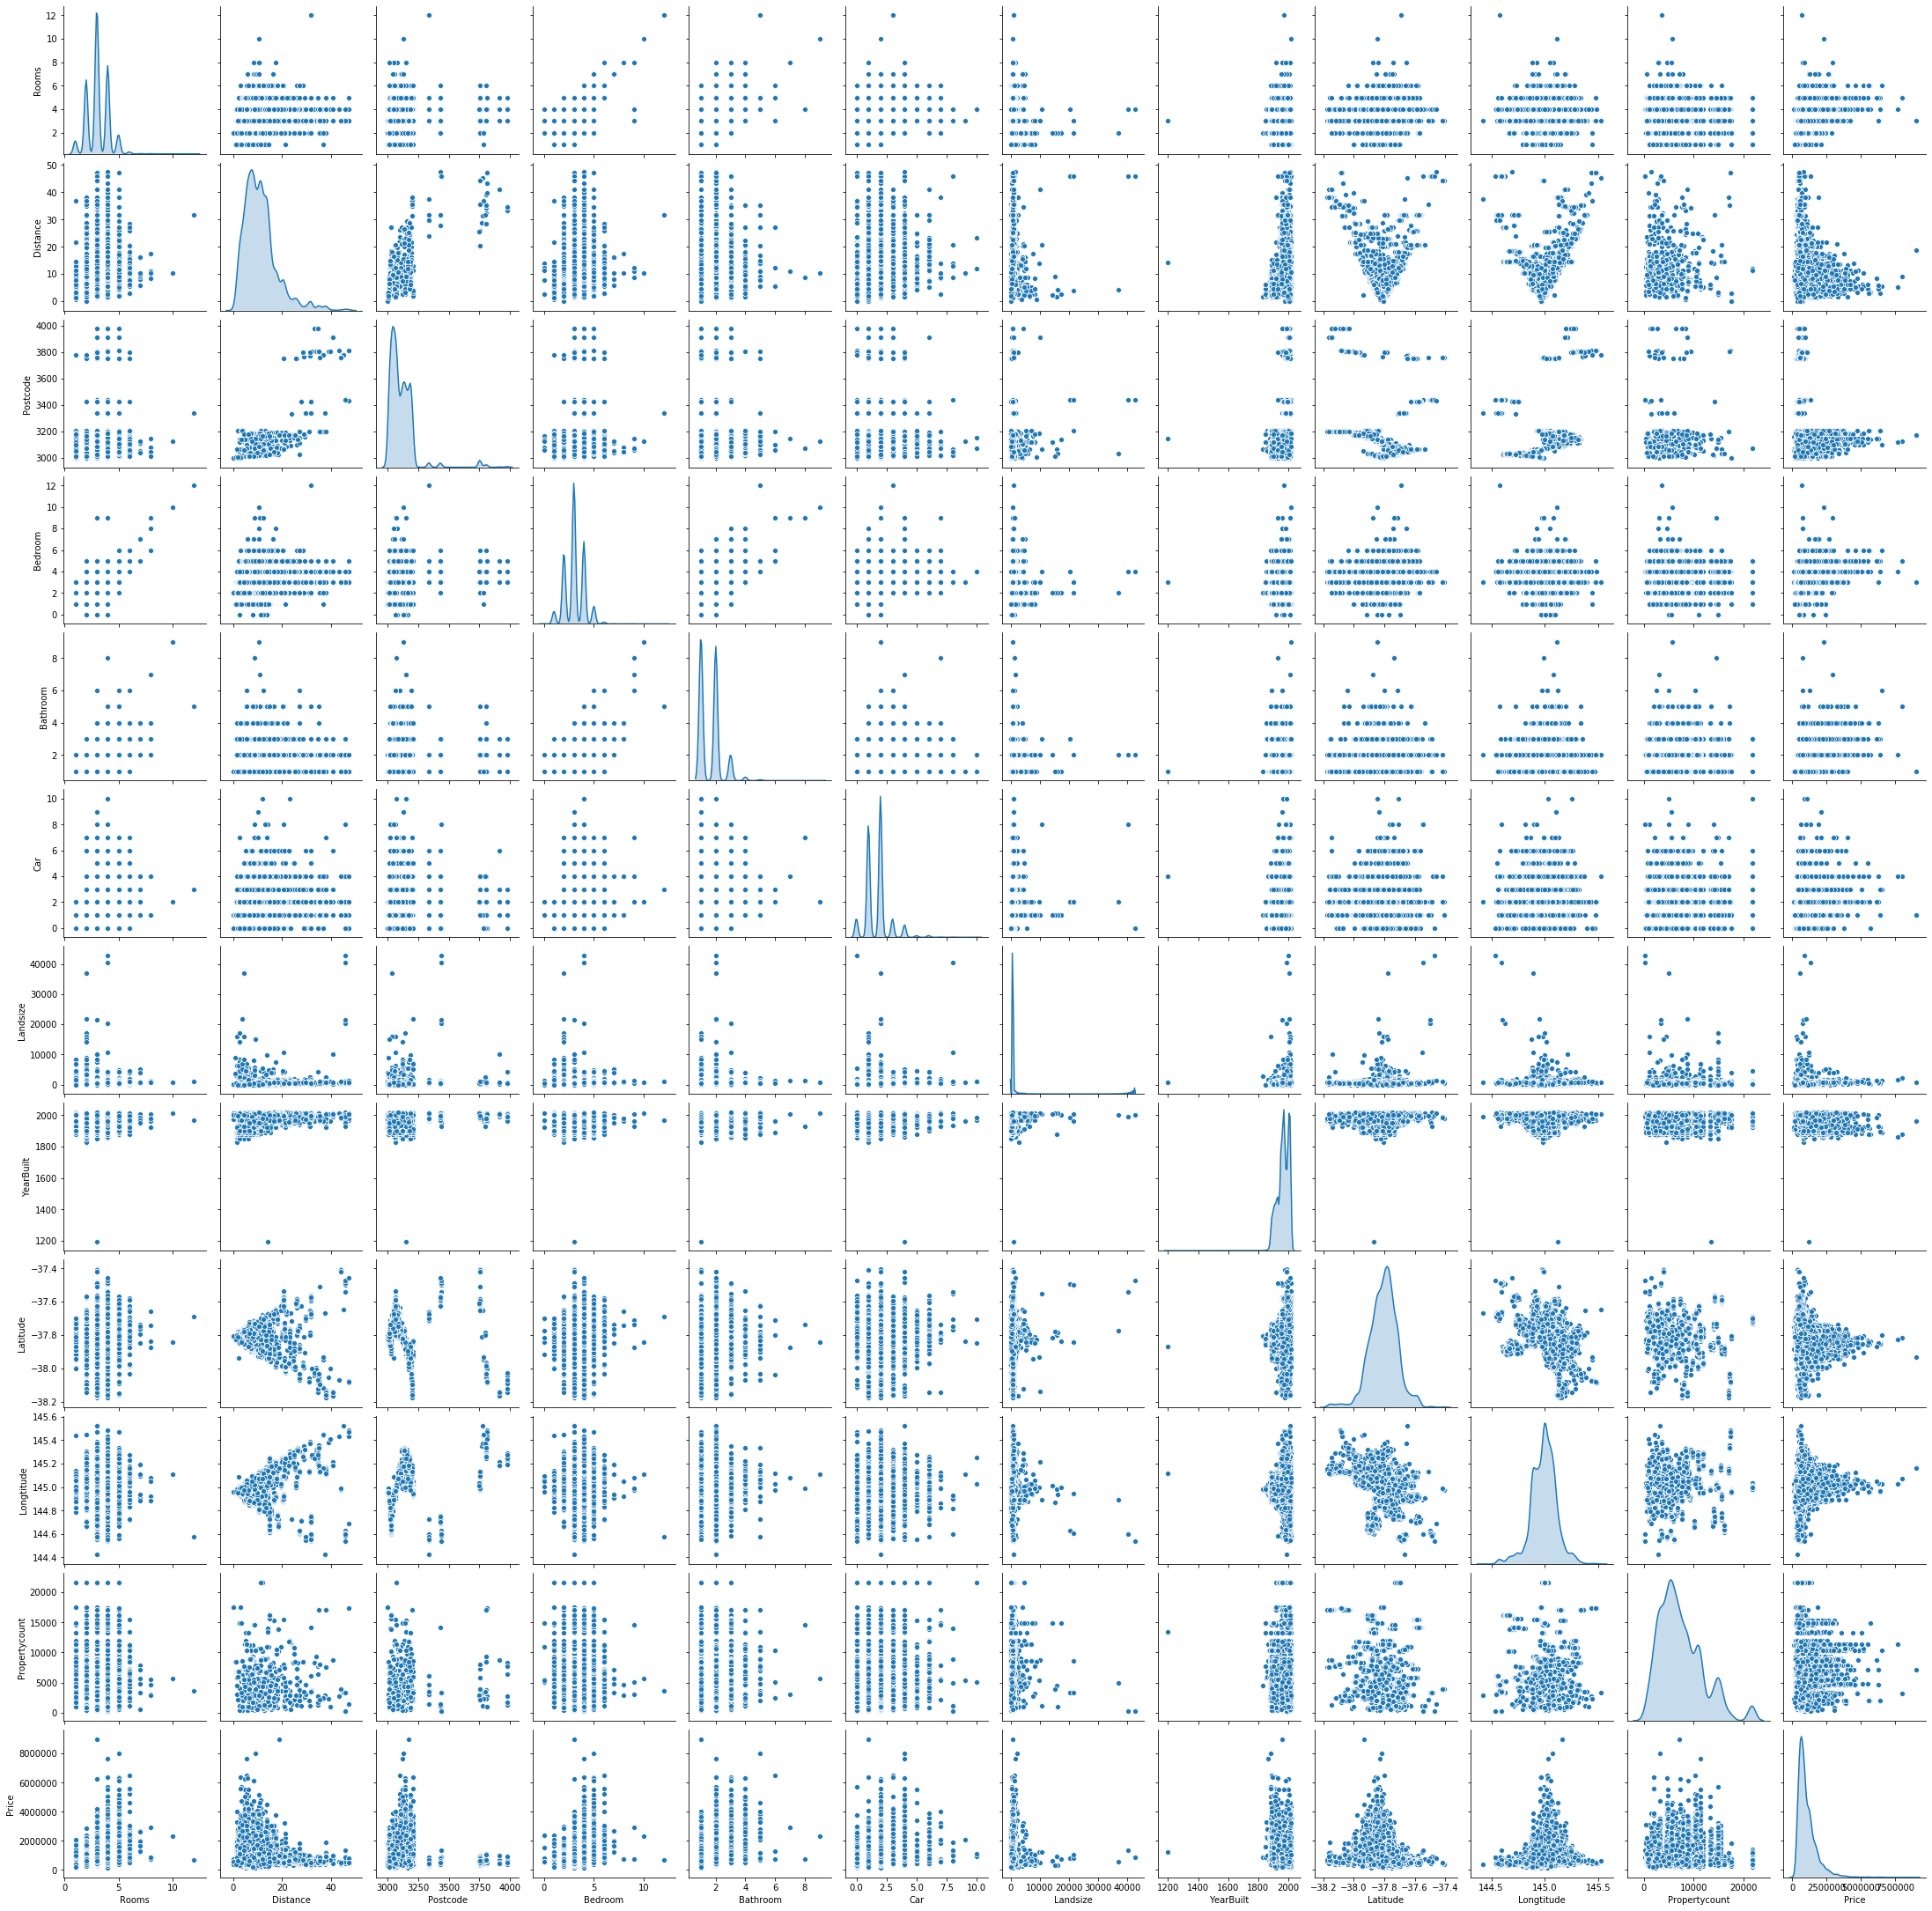

In [78]:
sns.pairplot(df1,diag_kind= 'kde');

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

#### Scatter Plot

Scatter plot can be plotted for two individual columns.

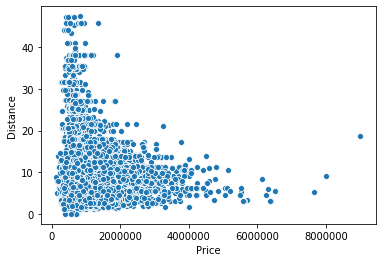

In [79]:
sns.scatterplot(df1['Price'],df1['Distance']);

The scatter plot only offers visual information about the degree of correlation. In order to obtain more precise information we can use the inbuilt .corr() method in Pandas. This returns a table with all the correlations calculated for the numerical columns.

In [80]:
df1.corr()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.000000,0.276490,0.084078,0.964475,0.624138,0.401395,0.101178,0.006944,0.019001,0.082831,-0.082604,0.475096
Distance,0.276490,1.000000,0.489550,0.283365,0.122035,0.259328,0.138568,0.313238,-0.055374,0.163922,-0.003173,-0.231222
Postcode,0.084078,0.489550,1.000000,0.087130,0.111470,0.055520,0.069603,0.089862,-0.195195,0.358014,0.032741,0.045962
Bedroom,0.964475,0.283365,0.087130,1.000000,0.626560,0.405543,0.101054,0.016320,0.022983,0.082491,-0.081207,0.460906
Bathroom,0.624138,0.122035,0.111470,0.626560,1.000000,0.310975,0.075939,0.192965,-0.041642,0.109141,-0.058255,0.463524
Car,0.401395,0.259328,0.055520,0.405543,0.310975,1.000000,0.123466,0.139322,0.015157,0.035530,-0.031244,0.209439
Landsize,0.101178,0.138568,0.069603,0.101054,0.075939,0.123466,1.000000,0.037696,0.042509,-0.008211,-0.032504,0.058394
YearBuilt,0.006944,0.313238,0.089862,0.016320,0.192965,0.139322,0.037696,1.000000,0.100042,-0.026872,0.017093,-0.313629
Latitude,0.019001,-0.055374,-0.195195,0.022983,-0.041642,0.015157,0.042509,0.100042,1.000000,-0.345845,0.029863,-0.224117
Longtitude,0.082831,0.163922,0.358014,0.082491,0.109141,0.035530,-0.008211,-0.026872,-0.345845,1.000000,0.026186,0.212117


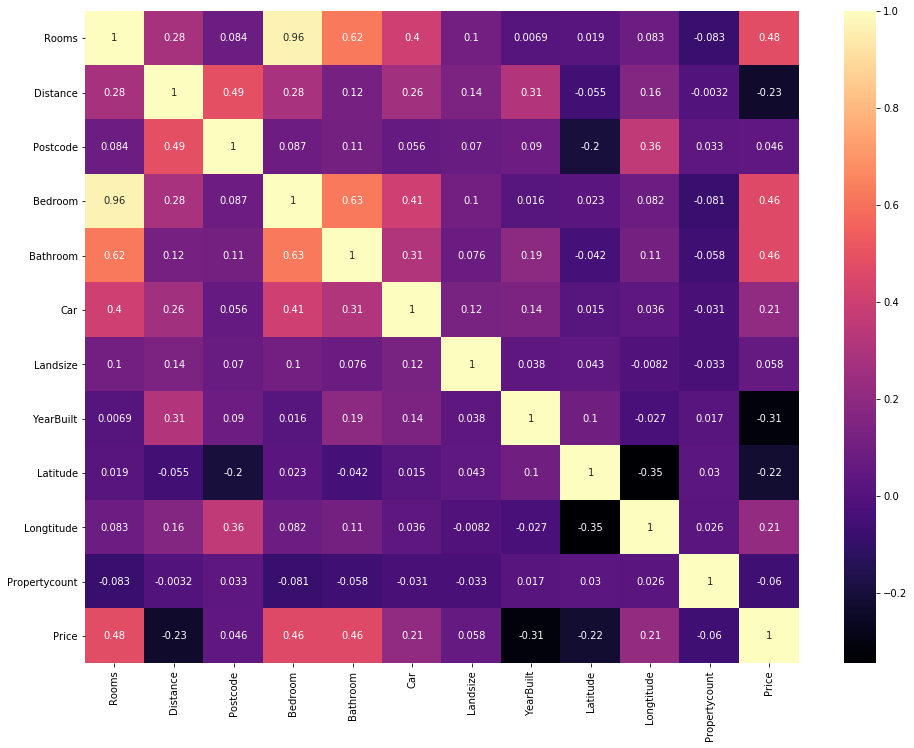

In [81]:
#chekcing correlation between independent varaibles
cor = df1.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma');

#### Another way of looking at multivariate scatter plot is to use the hue option in the scatterplot() function in seaborn.

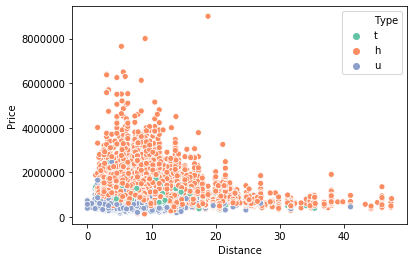

In [82]:
sns.scatterplot(df1['Distance'], df1['Price'], hue=df1['Type'], palette='Set2'); 

Here the colour of the dots indicates a third variable - Bedroom